In [21]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [22]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train = False)

In [23]:
# 定义一个函数随机初始化模型参数
def init_params():
    w = torch.normal(0, 1, size = (num_inputs, 1), requires_grad = True)
    b = torch.zeros(1, requires_grad = True)
    return [w, b]

In [24]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [27]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel = 'epochs', ylabel = 'loss', yscale = 'log',
                            xlim = [5, num_epochs], legend = ['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量    
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())
        

w的L2范数是： 13.063612937927246


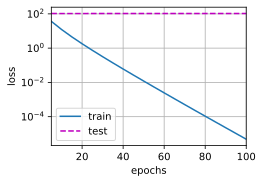

In [28]:
train(lambd = 0)

w的L2范数是： 0.3824991285800934


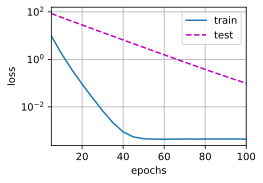

In [29]:
train(lambd = 3)

w的L2范数是： 0.02269977703690529


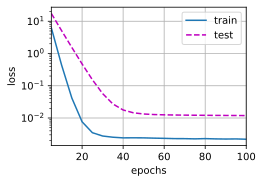

In [30]:
train(lambd = 10)

w的L2范数是： 0.018039315938949585


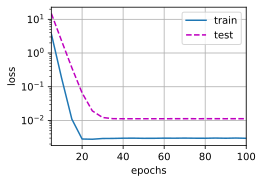

In [31]:
train(lambd = 15)

w的L2范数是： 0.016299817711114883


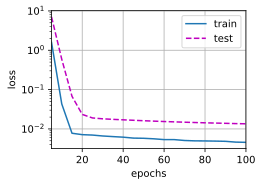

In [32]:
train(lambd = 20)

w的L2范数是： 0.011535202153027058


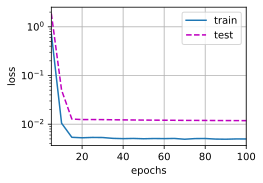

In [33]:
train(lambd = 30)

w的L2范数是： 0.007863941602408886


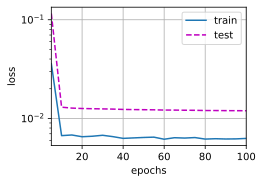

In [34]:
train(lambd = 50)

w的L2范数是： 0.004417477175593376


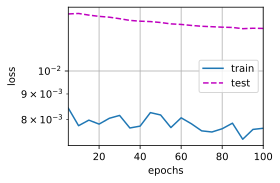

In [35]:
train(lambd = 100)

In [36]:
# 简洁实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 14.063567161560059


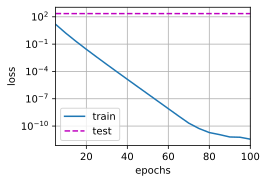

In [37]:
train_concise(0)

w的L2范数： 0.3703018128871918


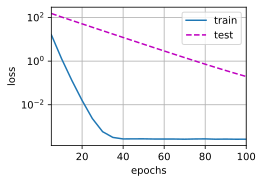

In [38]:
train_concise(3)